<a href="https://colab.research.google.com/github/Praneesh-Sharma/BritishAirways_DataScience/blob/main/Task_1/airline_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [ ]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Another BA Shambles. Starte...
1,Not Verified | BA cancelled my flight home to...
2,"Not Verified | BA cancelled my flight home, t..."
3,✅ Trip Verified | Turned up 3.5 hours in advan...
4,Not Verified | Boarding – at gate at LGW they...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
for i in range(0,5):
    print(df['reviews'][i], end="\n\n")
    

✅ Trip Verified |  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 people and the guy in 1A got it. I bet he felt like he’d won the lottery. Ok I’ll have the beef wellington, basically a freezing slice of beef with some lettuce. Mains,  I’ll have the curry, no 

In [ ]:
' '.join(df['reviews'].tolist())

'✅ Trip Verified |  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 people and the guy in 1A got it. I bet he felt like he’d won the lottery. Ok I’ll have the beef wellington, basically a freezing slice of beef with some lettuce. Mains,  I’ll have the curry, no

In [ ]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"verified" : "",
"Verified" : "",    
"Trip" : "",
"Not" : "",
"✅" : "",
"|" : "",
"   " : "",
"  " : ""
}

This is a list of contractions taken from the wiki.

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x

In [ ]:
df['reviews'] = df['reviews'].apply(lambda x: cont_to_exp(x))

In [ ]:
' '.join(df['reviews'].tolist())

' Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 people and the guy in 1A got it. I bet he felt like he’d won the lottery. Ok I’ll have the beef wellington, basically a freezing slice of beef with some lettuce. Mains,I’ll have the curry, no you won’t as they’v

All the contractions have been converted into their respective key values.

## **Feature Engineering**

In [ ]:
from textblob import TextBlob

In [ ]:
df.head(5)

,reviews,polarity,review_len,word_count,avg_word_len
0,Another BA Shambles. Started off well with ex...,0.293125,1477,267,4.513109
1,BA cancelled my flight home to Heathrow on De...,-0.227500,774,143,4.391608
2,"BA cancelled my flight home, the last flight ...",-0.020455,840,160,4.231250
3,"Turned up 3.5 hours in advance, Terminal 5 at ...",-0.021053,918,163,4.619632
4,Boarding – at gate at LGW they called Group 1...,0.036052,2197,409,4.364303


In [ ]:
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df['review_len'] = df['reviews'].apply(lambda x: len(x))

In [ ]:
df['word_count'] = df['reviews'].apply(lambda x: len(x.split()))

In [ ]:
def get_avg_word_len(x):
  words = x.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  return word_len/len(words)

In [ ]:
df['avg_word_len'] = df['reviews'].apply(lambda x: get_avg_word_len(x))

In [ ]:
df.head(5)

,reviews,polarity,review_len,word_count,avg_word_len
0,Another BA Shambles. Started off well with ex...,0.293125,1470,265,4.547170
1,BA cancelled my flight home to Heathrow on De...,-0.227500,771,143,4.391608
2,"BA cancelled my flight home, the last flight ...",-0.020455,837,160,4.231250
3,"Turned up 3.5 hours in advance, Terminal 5 at ...",-0.021053,915,163,4.619632
4,Boarding – at gate at LGW they called Group 1...,0.036052,2194,409,4.364303


## **Distribution of Sentiment Polarity**

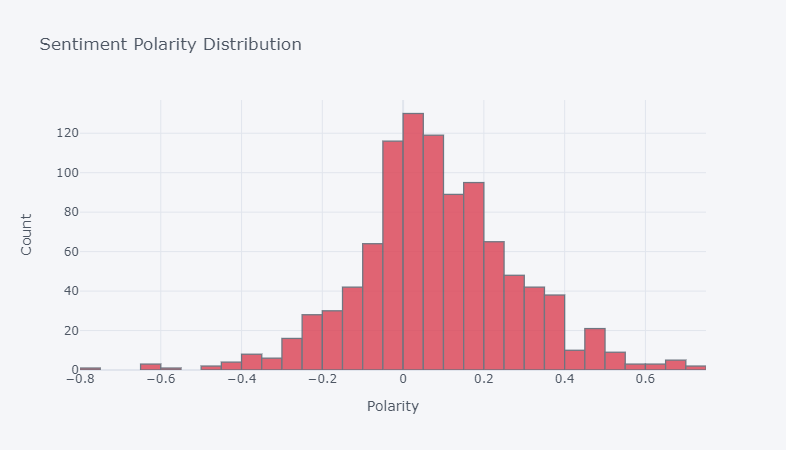

In [ ]:
df['polarity'].iplot(kind = 'hist', colors = 'red',
                    xTitle = 'Polarity', yTitle='Count',
                    title = 'Sentiment Polarity Distribution')

The polarity of major reviews is nearly 0, so the reviews are mostly neutral.

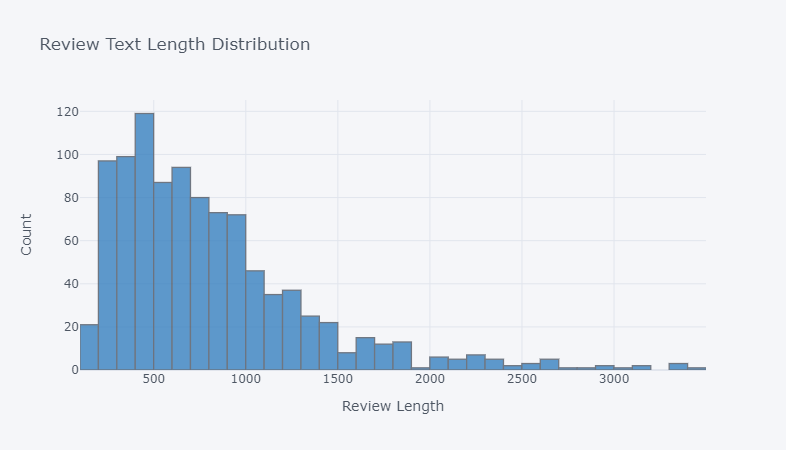

In [ ]:
df['review_len'].iplot(kind = 'hist', colors='blue',
                      xTitle = 'Review Length',yTitle = 'Count',
                      title = 'Review Text Length Distribution')

Most of the reviews have an average length of 400-500 charcters.

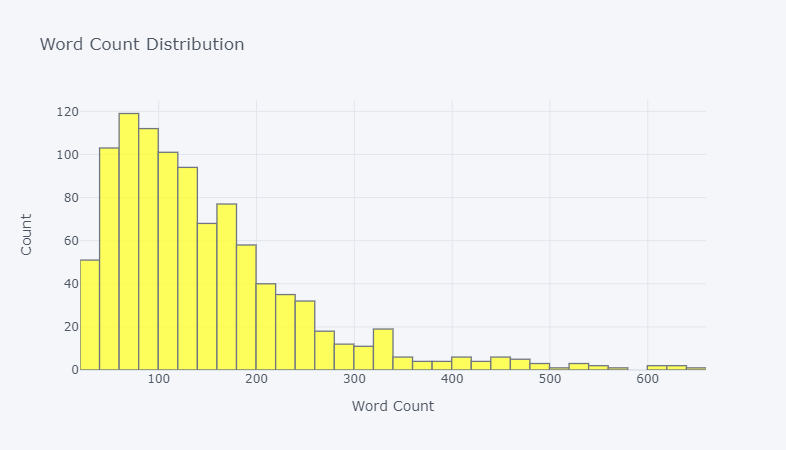

In [ ]:
df['word_count'].iplot(kind = 'hist', colors='yellow',
                      xTitle = 'Word Count',yTitle = 'Count',
                      title = 'Word Count Distribution')

Most of the reviews have an average word count of 60-70 words.

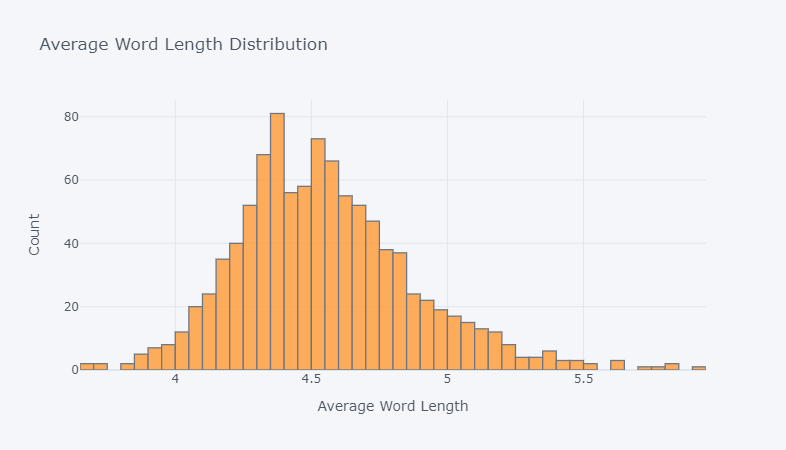

In [ ]:
df['avg_word_len'].iplot(kind = 'hist', colors='orange',
                      xTitle = 'Average Word Length',yTitle = 'Count',
                      title = 'Average Word Length Distribution')

Most of the reviews have an average word length of 4.3 or 4.5

## **Distribution of Unigram**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['reviews'], 20)
words

[('flight', 1807),
 ('ba', 1182),
 ('service', 727),
 ('london', 692),
 ('seat', 558),
 ('food', 519),
 ('crew', 498),
 ('time', 485),
 ('good', 460),
 ('seats', 441),
 ('class', 437),
 ('cabin', 434),
 ('staff', 399),
 ('business', 389),
 ('british', 383),
 ('airways', 375),
 ('check', 358),
 ('heathrow', 335),
 ('did', 330),
 ('hours', 292)]

these are the top 20 words in the reviews.

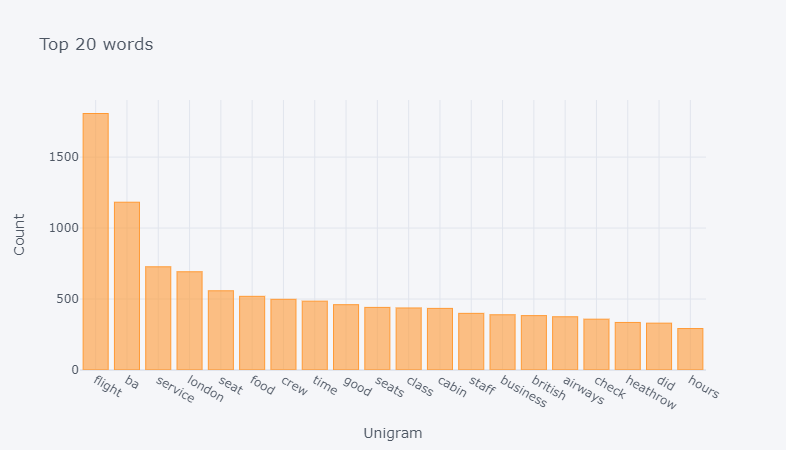

In [ ]:
df1 = pd.DataFrame(words, columns = ['Unigram' , 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind='bar', xTitle='Unigram', yTitle='Count', title='Top 20 words')

## **Distribution of Bigram**

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['reviews'], 20)
words

[('british airways', 363),
 ('business class', 276),
 ('cabin crew', 197),
 ('customer service', 161),
 ('london heathrow', 129),
 ('premium economy', 85),
 ('return flight', 77),
 ('club world', 75),
 ('club europe', 66),
 ('connecting flight', 53),
 ('hour flight', 53),
 ('long haul', 53),
 ('leg room', 50),
 ('flight delayed', 49),
 ('flight london', 45),
 ('ground staff', 38),
 ('fly ba', 34),
 ('ba staff', 34),
 ('flight cancelled', 33),
 ('booked flight', 32)]

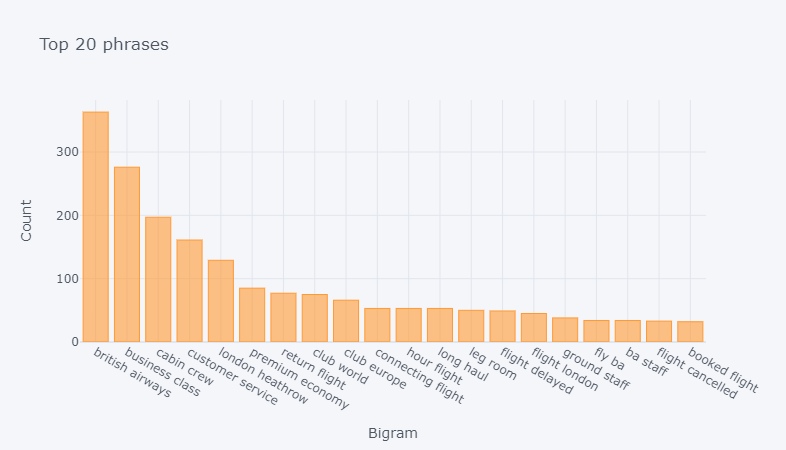

In [ ]:
df1 = pd.DataFrame(words, columns = ['Bigram' , 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind='bar', xTitle='Bigram', yTitle='Count', title='Top 20 phrases')

## **Distribution of Trigram**

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['reviews'], 20)
words

[('business class seats', 17),
 ('business class passengers', 14),
 ('fly british airways', 13),
 ('ba customer service', 12),
 ('flight british airways', 12),
 ('ba business class', 12),
 ('extra leg room', 12),
 ('missed connecting flight', 11),
 ('heathrow british airways', 11),
 ('new club world', 10),
 ('business class experience', 10),
 ('hong kong london', 10),
 ('long haul flights', 10),
 ('long haul flight', 10),
 ('british airways flight', 10),
 ('flight delayed hours', 9),
 ('world traveller plus', 9),
 ('business class seat', 9),
 ('san francisco london', 9),
 ('flight cabin crew', 9)]

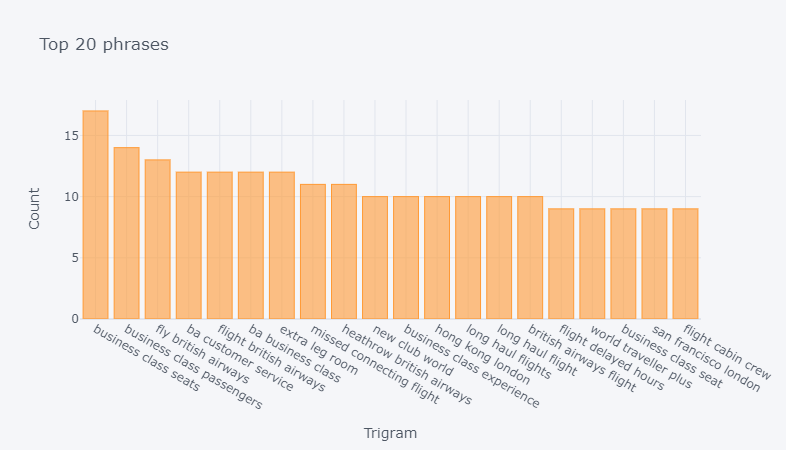

In [ ]:
df1 = pd.DataFrame(words, columns = ['Trigram' , 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind='bar', xTitle='Trigram', yTitle='Count', title='Top 20 phrases')

## **Distribution of Top 20 Parts-of-Speech(POS) tags**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /usr/share/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
print(str(df['reviews']))

0       Another BA Shambles. Started off well with ex...
1       BA cancelled my flight home to Heathrow on De...
2       BA cancelled my flight home, the last flight ...
3      Turned up 3.5 hours in advance, Terminal 5 at ...
4       Boarding – at gate at LGW they called Group 1...
                             ...                        
995     London to Muscat first class. First time tryi...
996     My family and I travelled from Cape Town to L...
997     Gatwick to Madeira. The flight left on time a...
998    London to Casablanca. Their customer service q...
999    British Airways flight manager is very profess...
Name: reviews, Length: 1000, dtype: object


In [ ]:
blob = TextBlob(str(df['reviews']))

In [ ]:
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
pos_df = pos_df['pos'].value_counts()
pos_df

NN      22
NNP     21
CD      14
IN       8
VBD      6
TO       5
JJ       5
DT       4
NNS      4
RB       3
PRP$     3
PRP      2
VBN      1
RP       1
CC       1
VBZ      1
Name: pos, dtype: int64

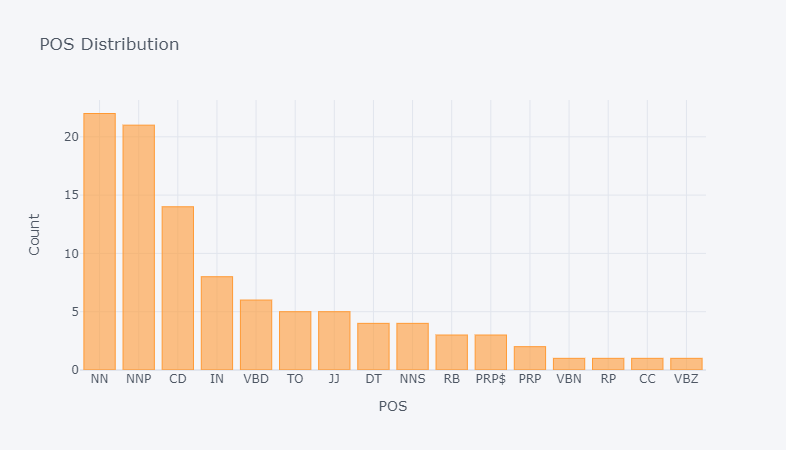

In [ ]:
pos_df.iplot(kind = 'bar', xTitle = 'POS', yTitle='Count', title='POS Distribution')

## **Bivariate Analysis**

In [ ]:
 df.head(5)

,reviews,polarity,review_len,word_count,avg_word_len
0,Another BA Shambles. Started off well with ex...,0.293125,1470,265,4.547170
1,BA cancelled my flight home to Heathrow on De...,-0.227500,771,143,4.391608
2,"BA cancelled my flight home, the last flight ...",-0.020455,837,160,4.231250
3,"Turned up 3.5 hours in advance, Terminal 5 at ...",-0.021053,915,163,4.619632
4,Boarding – at gate at LGW they called Group 1...,0.036052,2194,409,4.364303


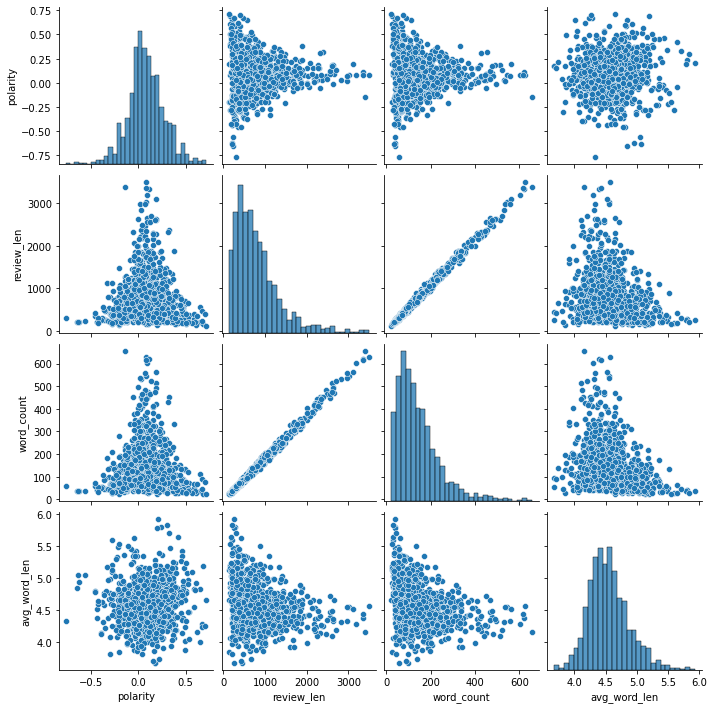

In [ ]:
sns.pairplot(df)